# Machine Learning for Predictive Analytics

## Objective : Reducing monthly churn by identifying high risk customers well in advance

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [73]:
#edit the file location of raw data set
cust_df=pd.read_csv("Telecom data.csv")
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


## Exercise

## Placeholder for your analysis

In [74]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape
print(cust_df['Churn'].value_counts())



(51047, 58)

No     36336
Yes    14711
Name: Churn, dtype: int64


### The dataset is imbalanced as the number of customers who churned are more than twice than that who didn't.

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [75]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
customer_zero_monthly_revenue = len(cust_df[cust_df['MonthlyRevenue'] == 0])
customer_zero_monthly_revenue

6

In [76]:
cust_df =  cust_df[cust_df['MonthlyRevenue'] > 0]

### Q1.2 How many columns has missing values percentage > 5%

In [77]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
(cust_df.isnull().sum()/cust_df.shape[0])*100

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.408789
PercChangeRevenues           0.408789
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    
As the missing values in each column very less, we can simply drop that row. Imputation is needed when the columns containing the data is very important and missing value percentage is very high say around 40% - 50%.

In [78]:
# Dropping rows with missing values
cust_df.dropna(inplace = True)

In [79]:
cust_df.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

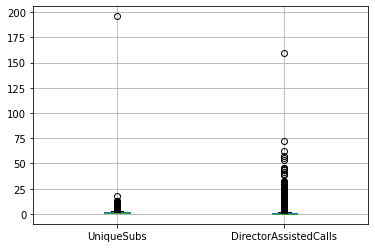

In [80]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [81]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
print(cust_df['UniqueSubs'].quantile(0.99))
print(cust_df['DirectorAssistedCalls'].quantile(0.99))

5.0
9.65


<AxesSubplot:>

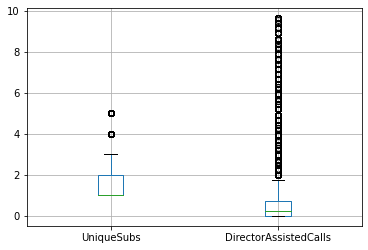

In [82]:
# As we have to remove top 1% data in the form of outlier from the above two columns. This means we need to take only 99% quantile
# values into consideration.

cust_df = cust_df[(cust_df['UniqueSubs'] <= 5.0) & (cust_df['DirectorAssistedCalls'] <= 9.65)]
cust_df.boxplot(column = cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

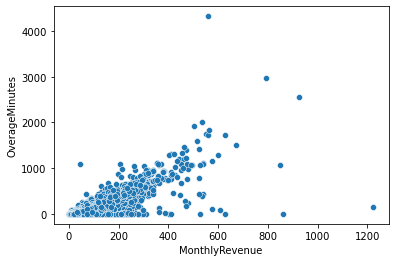

In [83]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

### As can be seen from the scatter plot that their exists a positive correlation between MonthlyRevenue & OverageMinutes

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

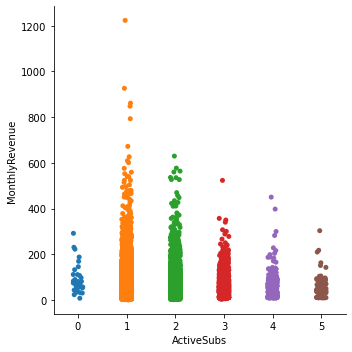

In [13]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df) 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis

### As can be seen from the above catplot that increasing the number of active subscribers leads to decreasing monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

In [14]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda x : x/x.sum(), axis = 0)
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda x : x/x.sum(), axis = 1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.693462,0.700059,0.692289,0.74253,0.782293,0.735915,0.712808
Yes,0.306538,0.299941,0.307711,0.25747,0.217707,0.264085,0.287192


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.162354,0.370602,0.159984,0.109293,0.138537,0.017906,0.041324
Yes,0.178887,0.395786,0.177249,0.094462,0.096099,0.016017,0.041501


<mark>__Result:__
    
Type your interpretation here based on the analysis above

### It seems that customers are churning irrespective of their credit rating & proportion of churned customers is large on high credit score

### Placeholder for additional exploratory analysis

In [ ]:
#type your code here for any additional exploratory analysis (if any)



## Q3. Create additional features to help predict churn

In [84]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute'] = cust_df['OverageMinutes']/cust_df['MonthlyMinutes']
    
    #3.4 Percent of Roaming call minutes over total monthly minutes
    cust_df['perc_Roaming_Calls'] = cust_df['RoamingCalls']/cust_df['MonthlyMinutes']
    
    #3.5 Percent of dropped call minutes over total monthly minutes
    cust_df['perc_Dropped_Calls'] = cust_df['DroppedCalls']/cust_df['MonthlyMinutes']
    
    #3.6 Percent of Blockedcall minutes over total monthly minutes
    cust_df['perc_Blocked_Calls'] = cust_df['DroppedCalls']/cust_df['MonthlyMinutes']
    
    #3.7 Percent of unansweredcall minutes over total monthly minutes
    cust_df['perc_Unanswered_Calls'] = cust_df['UnansweredCalls']/cust_df['MonthlyMinutes']
    
    #3.8 Percent of customercarecall minutes over total monthly minutes
    cust_df['perc_Customer_Care_Calls'] = cust_df['CustomerCareCalls']/cust_df['MonthlyMinutes']
    
    #3.9 Percent of Threewaycalls minutes over total monthly minutes
    cust_df['perc_Threeway_Calls'] = cust_df['ThreewayCalls']/cust_df['MonthlyMinutes']
    
    #3.10 Percent of Receivedcall minutes over total monthly minutes
    cust_df['perc_Received_Calls'] = cust_df['ReceivedCalls']/cust_df['MonthlyMinutes']
    
    #3.11 Percent of OutboundCalls minutes over total monthly minutes
    cust_df['perc_Outbound_Calls'] = cust_df['OutboundCalls']/cust_df['MonthlyMinutes']
    
    #3.12 Percent of InboundCall minutes over total monthly minutes
    cust_df['perc_Inbound_Calls'] = cust_df['InboundCalls']/cust_df['MonthlyMinutes']
    
    #3.13 percent of OffpeakcallsInOut minutes over total monthly minutes
    cust_df['perc_OffPeakCalls_InOut'] = cust_df['OffPeakCallsInOut']/cust_df['MonthlyMinutes']
    
    #3.15 percent of peakcallsInOut minutes over total monthly minutes
    cust_df['perc_PeakCalls_InOut'] = cust_df['PeakCallsInOut']/cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [85]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)


In [86]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49064 entries, 0 to 51043
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49064 non-null  int64  
 1   Churn                      49064 non-null  object 
 2   MonthlyRevenue             49064 non-null  float64
 3   MonthlyMinutes             49064 non-null  float64
 4   TotalRecurringCharge       49064 non-null  float64
 5   DirectorAssistedCalls      49064 non-null  float64
 6   OverageMinutes             49064 non-null  float64
 7   RoamingCalls               49064 non-null  float64
 8   PercChangeMinutes          49064 non-null  float64
 9   PercChangeRevenues         49064 non-null  float64
 10  DroppedCalls               49064 non-null  float64
 11  BlockedCalls               49064 non-null  float64
 12  UnansweredCalls            49064 non-null  float64
 13  CustomerCareCalls          49064 non-null  flo

In [87]:
# Splitting the columns into categorical & numerical
continuous_col = [i for i in cust_df.columns if cust_df[i].dtype != 'object' ]
categorical_col = [m for m in cust_df.columns if cust_df[m].dtype == 'object']

# Since 'Customer_ID', 'Churn'(target variable) and 'ServiceArea' columns are of no use in the data analysis. So it needs to be 
# eliminated from the lists
continuous_col.remove('CustomerID')
categorical_col.remove('ServiceArea')
categorical_col.remove('Churn')

continuous_col
print(categorical_col)


['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'perc_active_subs',
 'perc_recurrent_charge',
 'perc_overage_minute',
 'perc_Roaming_Calls',
 'perc_Dropped_Calls',
 'perc_Blocked_Calls',
 'perc_Unanswered_Calls',
 'perc_Customer_Care_Calls',
 'perc_Threeway_Calls',
 'perc_Received_Calls',
 'perc_Outbound_Calls',
 'perc_Inbound_Calls',
 'perc_OffPeakCalls_InOut',
 'pe

['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']


In [88]:
# Writing a function that does chi square test to validate whether the given categorical variable has an impact on Churn. It
# helps to filter out categorical variable that has no impact on Churn.

def check_categorical_imp(cust_df, categorical_col):
    new_cat_column = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
            pass
        else:
            new_cat_column.append(i)
    return new_cat_column

In [89]:
categorical_col = check_categorical_imp(cust_df, categorical_col)

In [90]:
continuous_col

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'perc_active_subs',
 'perc_recurrent_charge',
 'perc_overage_minute',
 'perc_Roaming_Calls',
 'perc_Dropped_Calls',
 'perc_Blocked_Calls',
 'perc_Unanswered_Calls',
 'perc_Customer_Care_Calls',
 'perc_Threeway_Calls',
 'perc_Received_Calls',
 'perc_Outbound_Calls',
 'perc_Inbound_Calls',
 'perc_OffPeakCalls_InOut',
 'pe

In [22]:
cust_df.Churn.value_counts()

No     35016
Yes    14048
Name: Churn, dtype: int64

In [91]:
cust_df['Churn'] = cust_df['Churn'].replace(['Yes', 'No'], [1, 0])
class_count_0, class_count_1 = cust_df['Churn'].value_counts()

class_0 = cust_df[cust_df['Churn'] == 0]
class_1 = cust_df[cust_df['Churn'] == 1]

class_1_over = class_1.sample(class_count_0, replace = True)
test_over = pd.concat([class_1_over, class_0], axis = 0)

cust_df = test_over
y = cust_df.Churn
(y.value_counts()/len(y))* 100

1    50.0
0    50.0
Name: Churn, dtype: float64

In [92]:
imp_categorical_col = check_categorical_imp(cust_df, categorical_col)
y = cust_df['Churn']
X = cust_df[imp_categorical_col + continuous_col]

In [93]:
(X[continuous_col].isnull().sum()/X.shape[0])* 100

MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.000000
PercChangeRevenues           0.000000
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
Handsets                     0.000000
HandsetModels                0.000000
CurrentEquip

In [94]:
X['perc_overage_minute'].fillna(X['perc_overage_minute'].mean(), inplace = True)
X['perc_Roaming_Calls'].fillna(X['perc_Roaming_Calls'].mean(), inplace = True)
X['perc_Dropped_Calls'].fillna(X['perc_Dropped_Calls'].mean(), inplace = True)
X['perc_Blocked_Calls'].fillna(X['perc_Blocked_Calls'].mean(), inplace = True)
X['perc_Unanswered_Calls'].fillna(X['perc_Unanswered_Calls'].mean(), inplace = True)
X['perc_Customer_Care_Calls'].fillna(X['perc_Customer_Care_Calls'].mean(), inplace = True)
X['perc_Threeway_Calls'].fillna(X['perc_Threeway_Calls'].mean(), inplace = True)
X['perc_Received_Calls'].fillna(X['perc_Received_Calls'].mean(), inplace = True)
X['perc_Outbound_Calls'].fillna(X['perc_Outbound_Calls'].mean(), inplace = True)
X['perc_Inbound_Calls'].fillna(X['perc_Inbound_Calls'].mean(), inplace = True)
X['perc_OffPeakCalls_InOut'].fillna(X['perc_OffPeakCalls_InOut'].mean(), inplace = True)
X['perc_PeakCalls_InOut'].fillna(X['perc_PeakCalls_InOut'].mean(), inplace = True)

In [95]:
X.isnull().sum()

HandsetRefurbished           0
HandsetWebCapable            0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
HasCreditCard                0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
MaritalStatus                0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsIn

In [96]:
X[X==np.inf]=np.nan
X.fillna(X.mean(), inplace=True)

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [97]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[continuous_col] = sc.fit_transform(X_train[continuous_col])

#Create dummy variables for all categorical variables
X_train = pd.get_dummies(X_train, columns = imp_categorical_col, drop_first = True)


In [98]:
X_test[continuous_col] = sc.transform(X_test[continuous_col])

#Create dummy variables for all categorical variables
X_test = pd.get_dummies(X_test, columns = imp_categorical_col, drop_first = True)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [99]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, plot_confusion_matrix, average_precision_score

log_c = LogisticRegression(random_state = 0).fit(X_train, y_train)
log_pred_train_output = log_c.predict_proba(X_train)[:,1]

In [100]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
log_pred_test_output = log_c.predict_proba(X_test)[:,1]

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix




In [101]:
import copy

def best_cutoff(actual_value, predicted):
    probability_cutoff = []
    f1_score_value = []
    
    for i in range(0, 101):
        predicted_x = copy.deepcopy(predicted)
        predicted_x[predicted_x >= i/100] = 1
        predicted_x[predicted_x < i/100] = 0
        probability_cutoff.append(i/100)
        f1_score_value.append(f1_score(actual_value, predicted_x))
        
    return(probability_cutoff, f1_score_value)

Text(0.5, 0, 'probability cutoff value train')

Text(0, 0.5, 'f1_score train')

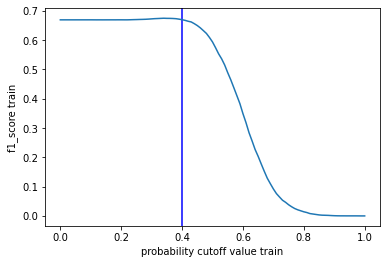

Text(0.5, 0, 'probability cutoff value test')

Text(0, 0.5, 'f1_score test')

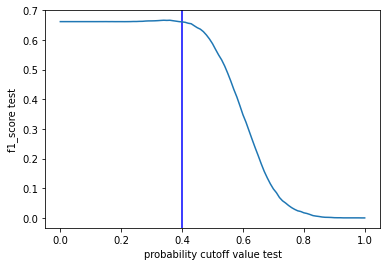

In [102]:
probability_cutoff, f1_score_value = best_cutoff(y_train, log_pred_train_output)

plt.xlabel('probability cutoff value train')
plt.axvline(x =0.4, color ='b', label = 'axvline-full height')
plt.ylabel('f1_score train')
plt.plot(probability_cutoff, f1_score_value)
plt.show()

probability_cutoff, f1_score_value = best_cutoff(y_test, log_pred_test_output)

plt.axvline(x = 0.4, color = 'b', label = 'axvline - full height')
plt.xlabel('probability cutoff value test')
plt.ylabel('f1_score test')
plt.plot(probability_cutoff, f1_score_value)
plt.show()

In [103]:
log_pred_test_output[log_pred_test_output < 0.4] = 0
log_pred_test_output[log_pred_test_output >= 0.4] = 1

print(classification_report(y_test, log_pred_test_output))
auc = roc_auc_score(y_test, log_c.predict_proba(X_test)[:, 1])
print("gini : {}".format(2*auc - 1))
print("The ROC_AUC of logistic classifier for test data: {}".format(auc))
confusion_matrix(y_test, log_pred_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, log_pred_test_output).ravel()
tn, fp, fn, tp

              precision    recall  f1-score   support

           0       0.67      0.23      0.34     10610
           1       0.53      0.88      0.66     10400

    accuracy                           0.55     21010
   macro avg       0.60      0.56      0.50     21010
weighted avg       0.60      0.55      0.50     21010

gini : 0.24712493656202428
The ROC_AUC of logistic classifier for test data: 0.6235624682810121


array([[2426, 8184],
       [1220, 9180]], dtype=int64)

(2426, 8184, 1220, 9180)

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [104]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier

rf_c = RandomForestClassifier(max_depth = 15, min_samples_split = 50, random_state = 12345, criterion ='entropy', n_estimators = 400, n_jobs = -1)
rf_c.fit(X_train, y_train)
rf_pred_train_output = rf_c.predict_proba(X_train)[:,1]




RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=50,
                       n_estimators=400, n_jobs=-1, random_state=12345)

In [105]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
rf_pred_test_output = rf_c.predict_proba(X_test)[:,1]

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix



Text(0.5, 0, 'probability cutoff value train')

Text(0, 0.5, 'f1_score train')

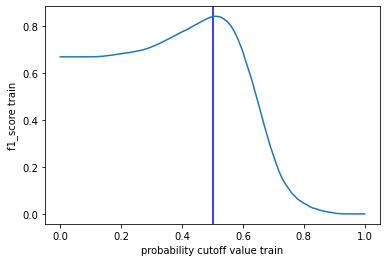

Text(0.5, 0, 'probability cutoff value test')

Text(0, 0.5, 'f1_score test')

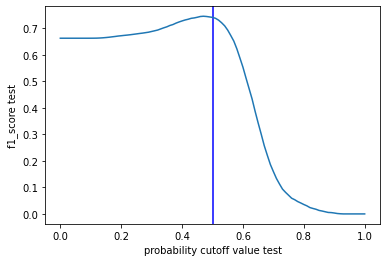

In [106]:
probability_cutoff, f1_score_value = best_cutoff(y_train, rf_pred_train_output)

plt.xlabel('probability cutoff value train')
plt.axvline(x =0.5, color ='b', label = 'axvline-full height')
plt.ylabel('f1_score train')
plt.plot(probability_cutoff, f1_score_value)
plt.show()

probability_cutoff, f1_score_value = best_cutoff(y_test, rf_pred_test_output)

plt.axvline(x = 0.5, color = 'b', label = 'axvline - full height')
plt.xlabel('probability cutoff value test')
plt.ylabel('f1_score test')
plt.plot(probability_cutoff, f1_score_value)
plt.show()

In [107]:
rf_pred_test_output[rf_pred_test_output < 0.5] = 0
rf_pred_test_output[rf_pred_test_output >= 0.5] = 1

print(classification_report(y_test, rf_pred_test_output))
auc = roc_auc_score(y_test, rf_c.predict_proba(X_test)[:, 1])
print("gini : {}".format(2*auc - 1))
print("The ROC_AUC of RandomForest classifier for test data: {}".format(auc))
confusion_matrix(y_test, rf_pred_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred_test_output).ravel()
tn, fp, fn, tp

              precision    recall  f1-score   support

           0       0.76      0.66      0.71     10610
           1       0.70      0.79      0.74     10400

    accuracy                           0.73     21010
   macro avg       0.73      0.73      0.73     21010
weighted avg       0.73      0.73      0.73     21010

gini : 0.6309182737620533
The ROC_AUC of RandomForest classifier for test data: 0.8154591368810267


array([[7037, 3573],
       [2182, 8218]], dtype=int64)

(7037, 3573, 2182, 8218)

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

In [115]:
# Random Forest Classifier has better accuracy than Logistic Regression. It has better ROC_AUC score than Logistic Regression.
# Classification report shows greater number of true positives & true negatives than Logistic Regression.

### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'feature importance plot')

<AxesSubplot:title={'center':'feature importance plot'}>

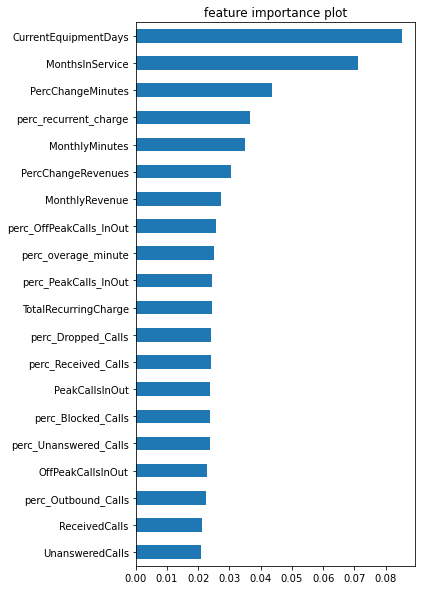

In [108]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feature_importance = pd.Series(rf_c.feature_importances_, index=X_train.columns)
plt.figure(figsize = (5, 10))
plt.title("feature importance plot")
feature_importance.nlargest(20).sort_values(ascending = True).plot(kind = 'barh')

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [109]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4
final_df = pd.read_csv('Telecom - Prediction Data.csv')

#Use "predict" function on the transformend data using the best fitted model object

final_df.isnull().sum()

CustomerID                       0
Churn                        20000
MonthlyRevenue                  60
MonthlyMinutes                  60
TotalRecurringCharge            60
DirectorAssistedCalls           60
OverageMinutes                  60
RoamingCalls                    60
PercChangeMinutes              135
PercChangeRevenues             135
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      4
Handsets                         0
HandsetModels       

In [110]:
(final_df.isnull().sum()/final_df.shape[0])*100

CustomerID                     0.000
Churn                        100.000
MonthlyRevenue                 0.300
MonthlyMinutes                 0.300
TotalRecurringCharge           0.300
DirectorAssistedCalls          0.300
OverageMinutes                 0.300
RoamingCalls                   0.300
PercChangeMinutes              0.675
PercChangeRevenues             0.675
DroppedCalls                   0.000
BlockedCalls                   0.000
UnansweredCalls                0.000
CustomerCareCalls              0.000
ThreewayCalls                  0.000
ReceivedCalls                  0.000
OutboundCalls                  0.000
InboundCalls                   0.000
PeakCallsInOut                 0.000
OffPeakCallsInOut              0.000
DroppedBlockedCalls            0.000
CallForwardingCalls            0.000
CallWaitingCalls               0.000
MonthsInService                0.000
UniqueSubs                     0.000
ActiveSubs                     0.000
ServiceArea                    0.020
H

In [111]:
Xf = final_df.drop(columns = ['CustomerID', 'Churn'])
yf = final_df['Churn']

In [112]:
cont_col = [i for i in Xf.columns if Xf[i].dtype != 'object' ]
cat_col = [m for m in Xf.columns if Xf[m].dtype == 'object']

In [115]:
Xf = create_features(Xf)

In [116]:
Xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             19940 non-null  float64
 1   MonthlyMinutes             19940 non-null  float64
 2   TotalRecurringCharge       19940 non-null  float64
 3   DirectorAssistedCalls      19940 non-null  float64
 4   OverageMinutes             19940 non-null  float64
 5   RoamingCalls               19940 non-null  float64
 6   PercChangeMinutes          19865 non-null  float64
 7   PercChangeRevenues         19865 non-null  float64
 8   DroppedCalls               20000 non-null  float64
 9   BlockedCalls               20000 non-null  float64
 10  UnansweredCalls            20000 non-null  float64
 11  CustomerCareCalls          20000 non-null  float64
 12  ThreewayCalls              20000 non-null  float64
 13  ReceivedCalls              20000 non-null  flo

In [117]:
Xf.fillna(Xf.mean(), inplace = True)

In [118]:
Xf.drop(columns = ['ServiceArea'], inplace = True)

In [119]:
Xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             20000 non-null  float64
 1   MonthlyMinutes             20000 non-null  float64
 2   TotalRecurringCharge       20000 non-null  float64
 3   DirectorAssistedCalls      20000 non-null  float64
 4   OverageMinutes             20000 non-null  float64
 5   RoamingCalls               20000 non-null  float64
 6   PercChangeMinutes          20000 non-null  float64
 7   PercChangeRevenues         20000 non-null  float64
 8   DroppedCalls               20000 non-null  float64
 9   BlockedCalls               20000 non-null  float64
 10  UnansweredCalls            20000 non-null  float64
 11  CustomerCareCalls          20000 non-null  float64
 12  ThreewayCalls              20000 non-null  float64
 13  ReceivedCalls              20000 non-null  flo

In [120]:
cat_col.remove('ServiceArea')

In [123]:
Xf[cont_col] = sc.fit_transform(Xf[cont_col])

#Create dummy variables for all categorical variables
Xf = pd.get_dummies(Xf, columns = cat_col, drop_first = True)

In [124]:
Xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MonthlyRevenue               20000 non-null  float64
 1   MonthlyMinutes               20000 non-null  float64
 2   TotalRecurringCharge         20000 non-null  float64
 3   DirectorAssistedCalls        20000 non-null  float64
 4   OverageMinutes               20000 non-null  float64
 5   RoamingCalls                 20000 non-null  float64
 6   PercChangeMinutes            20000 non-null  float64
 7   PercChangeRevenues           20000 non-null  float64
 8   DroppedCalls                 20000 non-null  float64
 9   BlockedCalls                 20000 non-null  float64
 10  UnansweredCalls              20000 non-null  float64
 11  CustomerCareCalls            20000 non-null  float64
 12  ThreewayCalls                20000 non-null  float64
 13  ReceivedCalls   

In [125]:
Xf[Xf == np.inf] = np.nan
Xf.fillna(Xf.mean(), inplace = True)

In [126]:
z = set(X_train.columns).intersection(set(Xf.columns))
len(z)

81

In [127]:
z = list(z)
Xf = Xf[z]
Xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PrizmCode_Town               20000 non-null  uint8  
 1   HandsetPrice_60              20000 non-null  uint8  
 2   CallForwardingCalls          20000 non-null  float64
 3   CustomerCareCalls            20000 non-null  float64
 4   MonthlyMinutes               20000 non-null  float64
 5   perc_Outbound_Calls          20000 non-null  float64
 6   MonthsInService              20000 non-null  float64
 7   perc_Threeway_Calls          20000 non-null  float64
 8   Homeownership_Unknown        20000 non-null  uint8  
 9   CreditRating_7-Lowest        20000 non-null  uint8  
 10  BuysViaMailOrder_Yes         20000 non-null  uint8  
 11  perc_PeakCalls_InOut         20000 non-null  float64
 12  perc_Blocked_Calls           20000 non-null  float64
 13  HandsetPrice_180

In [128]:
yf = rf_c.predict(Xf)

In [129]:
Final_Output = pd.DataFrame({'Customer_ID': final_df['CustomerID'], 'Churn': yf})
Final_Output

,Customer_ID,Churn
0,3000006,1
1,3000018,1
2,3000034,1
3,3000070,1
4,3000074,1
...,...,...
19995,3399938,1
19996,3399950,1
19997,3399966,1
19998,3399970,1


In [136]:
!pip install scikit-plot

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

Text(0.5, 0, 'Predicted Probability')

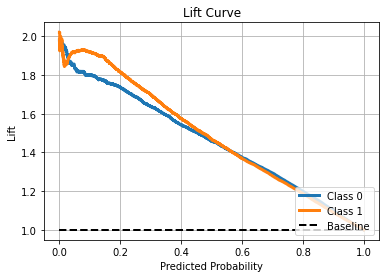

In [140]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)
import scikitplot as skplt


target_prob = rf_c.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, target_prob)
plt.xlabel("Predicted Probability")
plt.show()

  

 





In [144]:
new_df = pd.DataFrame({'Monthly_Revenue': X_test['MonthlyRevenue'], 'Predicted_probability': target_prob[:,1]})
#new_df.sort_values(by = 'Predicted_probability', ascending = False)
new_df

,Monthly_Revenue,Predicted_probability
9874,0.240530,0.505736
18498,-0.278114,0.612253
43442,1.872570,0.503964
18634,-0.147436,0.415159
41496,0.530367,0.458707
...,...,...
34808,-0.038059,0.292292
27953,1.057388,0.652927
33804,0.598818,0.444152
38902,-0.694561,0.560369


In [145]:
new_df.sort_values(by = 'Predicted_probability', ascending = False)

,Monthly_Revenue,Predicted_probability
39493,-0.898476,0.923534
17002,-0.898476,0.920203
17002,-0.898476,0.920203
38884,-0.898476,0.917808
38884,-0.898476,0.917808
...,...,...
49250,-0.533487,0.106090
38809,-0.539470,0.103297
41573,-0.539470,0.100732
39242,-0.569866,0.093258


<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   